# AI/ML Project / Phase 1
## **Course Name**: Machine Learning Techniques  
## **Project Title**: Detecting AI-Generated Text  

---

### **Team Members**:
- Amr [Replace with Full Name]
- Lukas
- Mohamad Hussen Chamsi  
  

---

### **Instructor**: [Instructor's Full Name]  


# 1 - AI Text Detection


## 1.1 - Problem Definition

# Developments in AI and Large Language Models (LLMs)

The recent developments in AI and large language models (LLMs) have been rapid and are growing exponentially. Lately, LLMs have become very popular and easily accessible to the public. Their use has assisted in many aspects of daily life due to their ability to provide convincingly sophisticated answers across a wide range of topics.

Models such as **GPT-3**, **PaLM**, and **ChatGPT** can answer complex questions about science, mathematics, history, social trends, and more (Mitchell et al., 2023). Earlier versions of LLMs were limited to the knowledge available at the time of their training. However, recent LLMs have become more advanced, enabling them to crawl the internet, fetch relevant data from web pages, and generate answers.

---

## Ethical Concerns

Despite their utility, the rapid development of LLMs raises significant ethical concerns:
- **Distinguishing AI-generated vs. human-written text**: It has become increasingly challenging to tell the difference between the two.  
- **Misuse**: Such powerful tools have been exploited for plagiarism and the production of false information on the internet.  
- **Hallucinations**: The generation of plausible but false content (referred to as hallucination [11, 12]) can inadvertently:
  - Propagate misinformation.
  - Spread false narratives, fake news, and spam.  

Given the rapid adoption of LLMs and the global rate of information dissemination, the risk of widespread misinformation propagation is imminent. This is a challenge that both individuals and organizations must address in the near future [13, 14].

---

## Need for Detection

An understanding of the source of authored content – whether by an AI system or a human – is crucial. This allows for the appropriate use of such content in downstream applications with suitable oversight.

Accordingly, there is an **urgent need for efficient methods to detect AI-generated text** (Guo et al., 2024).


## 1.2 - Connection To SDGs :

Connecting the Project to Sustainable Development Goals (SDGs) Our project, focal point on addressing the challenges created by generative AI technologies, like identifying whether a text is written by AI or humans.
 This is important because AI-generated have is often misused for false informtion or plagiarism. By tackling these matter , our project supports many of (SDGs) Goals .

Here are some of them:

SDG 4: Quality Education. Our project helps universities and schools detect AI-generated content to ensure right and academic integrity.

SDG 16: Peace, Justice, and Strong Institutions : Our contribution with the project is to try and limit the spread and helps block the false information . This will help build up trust and transparency, key elements of peaceful societies.

SDG 9:
Industry, Innovation, and Infrastructure: AI will be a powerful driver for innovation, but if misuse can lead to negative consequences. Our project boost responsible AI development by creating systems to manage its risks, like detecting misuse. our project contributes to building strong and trust digital infrastructures, fostering innovation that is ethical and inclusive
SDG 17:
Partnership for the Goals We work with educational institutions and technology companies to establish standardized methods for AI-text detection.


## 1.3 - Overview of our Approach

# 2 - Import Libraries

In [ ]:
!pip install gdown
!pip install emoji
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 5.5 MB/s eta 0:00:00


In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Import matplotlib for creating visualizations such as bar plots and pie charts.
import seaborn as sns  # Import seaborn for enhanced data visualization, especially statistical plots.##
from google.colab import files
import zipfile
import gdown
import re  # Import the `re` module for performing regular expressions operations, useful for text cleaning and pattern matching.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import emoji  # Import the `emoji` library to handle emojis in text, including detecting and converting them to text representations.
import contractions  # Import the `contractions` library to expand shortened words in text (e.g., "can't" to "cannot"), improving readability and analysis.
import nltk # Import the nltk library
from nltk.corpus import stopwords  # Import the `stopwords` list from `nltk`, used to filter out common words (e.g., "and", "the") that may not add significant value.
from nltk.stem import WordNetLemmatizer  # Import the `WordNetLemmatizer` from `nltk` for reducing words to their base or root forms (e.g., "running" to "run").

# 3 - Connect to Kaggle
Whenever we use a Dataset from Kaggle, we load it directly from kaggle using the Kaggle API.

To load any Kaggle dataset, you need to first download Kaggle's beta API, and to accept the kaggle competition rules.

Get Kaggle API Credentials:
- Go to your Kaggle account settings and scroll to the API section.
- Click on Create New API Token. This will download a kaggle.json file containing your Kaggle API credentials.
- Then you need to upload the kaggle.json file to collab and run the following commands

In [ ]:
# upload your kaggle.json file
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amrashrafkandil","key":"1d17ebbf21d4cea1c08abf3afbd3fdcd"}'}

In [ ]:
# move the file to the required directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Make sure the kaggle.json file has the correct permissions
!chmod 600 ~/.kaggle/kaggle.json

# 4 - Dataset



## 4.1 Kaggle Competition Dataset

## Competition Overview
This competition challenges participants to develop a machine learning model that can accurately detect whether an essay was written by a student or an LLM. The competition dataset comprises a mix of student-written essays and essays generated by a variety of LLMs.

## Dataset Link
[LLM - Detect AI Generated Text Dataset](https://www.kaggle.com/competitions/llm-detect-ai-generated-text/data)
## Dataset Description


* All of the essays were written in response to one of **seven essay prompts**.
* For each prompt, the subject (student or LLM) is given a list of source text to read and write their response from
  - Students were instructed to read one or more source texts and then write a response.
  - Participants of the competition should use the prompts and source text (provided in "train_prompts.csv") to generate AI generated Essays
* The **training set** includes just answers from two prompts, Essays from two of the prompts compose the **training set**, while the answers for the other 5 compose the **hidden test set**.
* Nearly all of the training set essays were written by students, with only a few generated essays given as examples.
* Participants of the competition are responsible to generate more essays to use as training data.



> **Note**: This is a Code Competition. The data in `test_essays.csv` is dummy data to help you author your solutions. When your submission is scored, this example test data will be replaced with the full test set. There are about **9,000 essays** in the test set, both student-written and LLM-generated.




## File structure
---

#### `{test|train}_essays.csv`
- `id` - A unique identifier for each essay.
- `prompt_id` - Identifies the prompt the essay was written in response to.
- `text` - The essay text itself.
- `generated` - Whether the essay was written by a student (`0`) or generated by an LLM (`1`). This field is the target and is **not present** in `test_essays.csv`.



---



#### `train_prompts.csv`
- This file is not important for training.
- It is provided in the competition to be used for LLM essay generation.

Essays were written in response to information in these fields:

- `prompt_id` - A unique identifier for each prompt.
- `prompt_name` - The title of the prompt.
- `instructions` - The instructions given to students.
- `source_text` - The text of the article(s) the essays were written in response to, in Markdown format.

  - **Format Details**:
    - Significant paragraphs are enumerated by a numeral preceding the paragraph on the same line, such as `0 Paragraph one.\n\n1 Paragraph two...`
    - Essays may reference a paragraph by its numeral.
    - Each article is preceded with its title in a heading, formatted as `# Title`.
    - When an author is indicated, their name will appear in the title after the word **by**.
    - Articles may also include subheadings formatted as `## Subheading`. Not all articles have authors indicated.

---


### Download Dataset Folder


Download the Dataset using the Kaggle API


In [ ]:
!kaggle competitions download -c llm-detect-ai-generated-text

  0% 0.00/1.38M [00:00<?, ?B/s]
100% 1.38M/1.38M [00:00<00:00, 39.8MB/s]


The Dataset is downloaded as .zip file, and it needs to be extracted


In [ ]:
with zipfile.ZipFile('llm-detect-ai-generated-text.zip', 'r') as zip_ref:
    zip_ref.extractall('llm-detect-ai-generated-text')

### Load Training Data

In [ ]:
BASE_PATH = '/content'

In [ ]:
train_data = pd.read_csv(f'{BASE_PATH}/llm-detect-ai-generated-text/train_essays.csv')
train_prompts = pd.read_csv(f'{BASE_PATH}/llm-detect-ai-generated-text/train_prompts.csv')

### Initial EDA

In [ ]:
train_data.head()

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0


In [ ]:
train_prompts.head()

,prompt_id,prompt_name,instructions,source_text
0,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ..."
1,1,Does the electoral college work?,Write a letter to your state senator in which ...,# What Is the Electoral College? by the Office...


In [ ]:
train_data.text[0]

'Cars. Cars have been around since they became famous in the 1900s, when Henry Ford created and built the first ModelT. Cars have played a major role in our every day lives since then. But now, people are starting to question if limiting car usage would be a good thing. To me, limiting the use of cars might be a good thing to do.\n\nIn like matter of this, article, "In German Suburb, Life Goes On Without Cars," by Elizabeth Rosenthal states, how automobiles are the linchpin of suburbs, where middle class families from either Shanghai or Chicago tend to make their homes. Experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe. Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe...and up to 50 percent in some carintensive areas in the United States. Cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go. Article

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1378 non-null   object
 1   prompt_id  1378 non-null   int64 
 2   text       1378 non-null   object
 3   generated  1378 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 43.2+ KB


In [ ]:
train_data.describe()

,prompt_id,generated
count,1378.000000,1378.000000
mean,0.486212,0.002177
std,0.499991,0.046625
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,1.000000,1.000000


In [ ]:
train_data["generated"].unique()

array([0, 1])

#### **Note 1**
- "Generated" has only two classes {0,1} or {not generated, generated}
- The Standard Deviation of this class is 0.04
- This means that the data biased towards the one class {not generated}




In [ ]:
train_prompts.head()

,prompt_id,prompt_name,instructions,source_text
0,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ..."
1,1,Does the electoral college work?,Write a letter to your state senator in which ...,# What Is the Electoral College? by the Office...


In [ ]:
train_prompts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   prompt_id     2 non-null      int64 
 1   prompt_name   2 non-null      object
 2   instructions  2 non-null      object
 3   source_text   2 non-null      object
dtypes: int64(1), object(3)
memory usage: 192.0+ bytes


In [ ]:
train_prompts.prompt_id.unique()

array([0, 1])

In [ ]:
train_prompts.instructions[0]

'Write an explanatory essay to inform fellow citizens about the advantages of limiting car usage. Your essay must be based on ideas and information that can be found in the passage set. Manage your time carefully so that you can read the passages; plan your response; write your response; and revise and edit your response. Be sure to use evidence from multiple sources; and avoid overly relying on one source. Your response should be in the form of a multiparagraph essay. Write your essay in the space provided.'

In [ ]:
train_prompts.instructions[1]

'Write a letter to your state senator in which you argue in favor of keeping the Electoral College or changing to election by popular vote for the president of the United States. Use the information from the texts in your essay. Manage your time carefully so that you can read the passages; plan your response; write your response; and revise and edit your response. Be sure to include a claim; address counterclaims; use evidence from multiple sources; and avoid overly relying on one source. Your response should be in the form of a multiparagraph essay. Write your response in the space provided.'

In [ ]:
train_prompts.source_text[0]

'# In German Suburb, Life Goes On Without Cars by Elisabeth Rosenthal\n\n1 VAUBAN, Germany—Residents of this upscale community are suburban pioneers, going where few soccer moms or commuting executives have ever gone before: they have given up their cars.\n\n2 Street parking, driveways and home garages are generally forbidden in this experimental new district on the outskirts of Freiburg, near the French and Swiss borders. Vauban’s streets are completely “car-free”—except the main thoroughfare, where the tram to downtown Freiburg runs, and a few streets on one edge of the community. Car ownership is allowed, but there are only two places to park—large garages at the edge of the development, where a car-owner buys a space, for $40,000, along with a home.\n\n3 As a result, 70 percent of Vauban’s families do not own cars, and 57 percent sold a car to move here. “When I had a car I was always tense. I’m much happier this way,” said Heidrun Walter, a media trainer and mother of two, as she 

In [ ]:
train_prompts.source_text[1]

"# What Is the Electoral College? by the Office of the Federal Register\n\n1 The Electoral College is a process, not a place. The founding fathers established it in the Constitution as a compromise between election of the President by a vote in Congress and election of the President by a popular vote of qualified citizens.\n\n2 The Electoral College process consists of the selection of the electors, the meeting of the electors where they vote for President and Vice President, and the counting of the electoral votes by Congress.\n\n3 The Electoral College consists of 538 electors. A majority of 270 electoral votes is required to elect the President. Your state’s entitled allotment of electors equals the number of members in its Congressional delegation: one for each member in the House of Representatives plus two for your Senators. . . .\n\n4 Under the 23rd Amendment of the Constitution, the District of Columbia is allocated 3 electors and treated like a state for purposes of the Electo

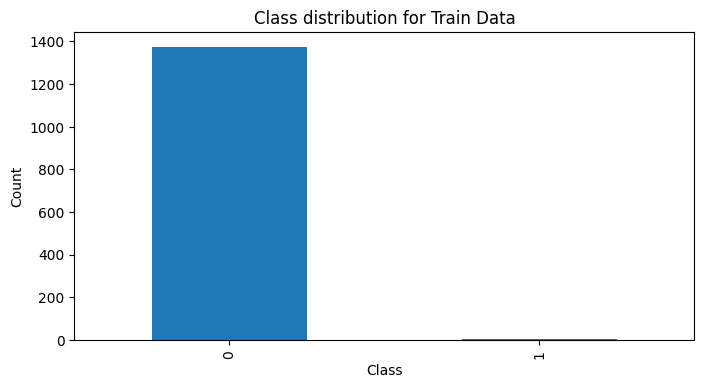

In [ ]:
# Show distribution of answers using a bar plot
plt.figure(figsize=(8, 4))
train_data.generated.value_counts().plot.bar()
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class distribution for Train Data")
plt.show()

#### **Note 2**
As shown in the diagram above, the data provided by the kaggle competition is skewed. There is no enough data for AI-generated Text

Accordingaly, we will either
- try to balance the dataset by augmenting AI-generated Text
- Or search for a new dataset



## 4.2 - AI-Text Generation

- Due to the class imbalance between human and AI generated text, we have made data augmentation
- Using the same prompts and text sources that were hended to humans to write their responses, we have created a new dataset of AI-generated Text
-  We have used openai's GPT-3.5-turbo-0125 model API
-  The model was given prompted with the each of the two prompts provided in the training dataset, along with the source text that it will use to write its answer from (same procedure as with humans)
-  This was done by prompt engineering the openai API. The code used can be found in the project repo (/data/OpenAI_generated_dataset/OpenAI_datasetGenerator.py)

The generated dataset is named "ai_generated.csv"

### Download the AI-Generated Dataset from a Google Drive Link

After running the python code for generating the AI-Text, we stored resulting data in a csv file on a google drive that is publicly available to view.


[link to the dataset generated from the OpenAI API](https://drive.google.com/file/d/14GwQprnCUY_n08uK_kmNJPZsZkLZtZ-r/view?usp=share_link)


-> We load the dataset directly by connecting to the Google Drive API

In [ ]:
file_id = "14GwQprnCUY_n08uK_kmNJPZsZkLZtZ-r"
destination = "phase1_dataset.csv"  # Specify the file name after download
gdown.download(f"https://drive.google.com/uc?id={file_id}", destination, quiet=False)


# Read the downloaded CSV file
augmented_data = pd.read_csv(destination)
print(augmented_data.head())


Downloading...
From: https://drive.google.com/uc?id=14GwQprnCUY_n08uK_kmNJPZsZkLZtZ-r
To: /content/phase1_dataset.csv
100%|██████████| 3.61M/3.61M [00:00<00:00, 67.5MB/s]

   id  prompt_id                                               text  generated
0   0          0  In recent years, there has been a growing tren...          1
1   1          0  Limiting car usage in cities can bring about n...          1
2   2          0  Limiting car usage in cities can bring about n...          1
3   3          0  Limiting car usage in cities can bring about n...          1
4   4          0  Car-free cities offer numerous advantages that...          1


In [ ]:
augmented_data

,id,prompt_id,text,generated
0,0,0,"In recent years, there has been a growing tren...",1
1,1,0,Limiting car usage in cities can bring about n...,1
2,2,0,Limiting car usage in cities can bring about n...,1
3,3,0,Limiting car usage in cities can bring about n...,1
4,4,0,Car-free cities offer numerous advantages that...,1
...,...,...,...,...
1395,1395,1,"Dear Senator,\n\nI am writing to express my su...",1
1396,1396,1,"Dear State Senator,\n\nI am writing to express...",1
1397,1397,1,"Dear Senator,\n\nI am writing to you today to ...",1
1398,1398,1,"Dear Senator,\n\nI am writing to express my su...",1


## 4.3 - Concatinate Data

In [ ]:
result_df = pd.concat([train_data, augmented_data], ignore_index=True)


In [ ]:
result_df

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0
...,...,...,...,...
2773,1395,1,"Dear Senator,\n\nI am writing to express my su...",1
2774,1396,1,"Dear State Senator,\n\nI am writing to express...",1
2775,1397,1,"Dear Senator,\n\nI am writing to you today to ...",1
2776,1398,1,"Dear Senator,\n\nI am writing to express my su...",1


In [ ]:
result_df.describe()

,prompt_id,generated
count,2778.000000,2778.000000
mean,0.493161,0.505040
std,0.500043,0.500065
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [ ]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2778 entries, 0 to 2777
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         2778 non-null   object
 1   prompt_id  2778 non-null   int64 
 2   text       2778 non-null   object
 3   generated  2778 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 86.9+ KB


In [ ]:
result_df.prompt_id.unique()

array([0, 1])

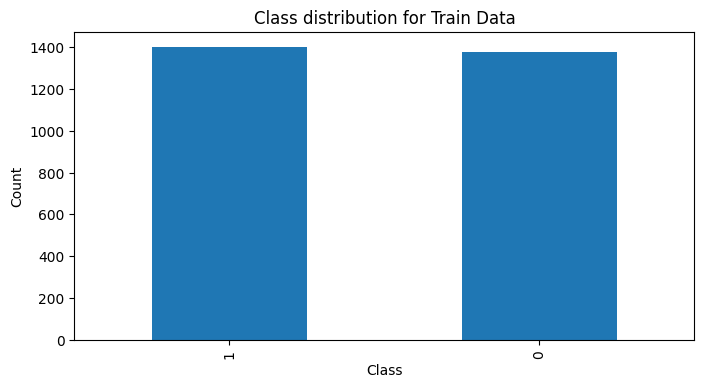

In [ ]:
# Show distribution of answers using a bar plot
plt.figure(figsize=(8, 4))
result_df.generated.value_counts().plot.bar()
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class distribution for Train Data")
plt.show()

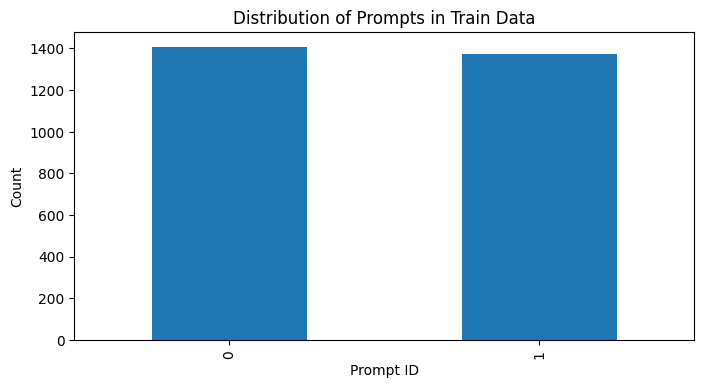

In [ ]:
# Show distribution of answers using a bar plot
plt.figure(figsize=(8, 4))
result_df.prompt_id.value_counts().plot.bar()
plt.xlabel("Prompt ID")
plt.ylabel("Count")
plt.title("Distribution of Prompts in Train Data")
plt.show()

In [ ]:
# Store the combined df to a csv file for later analysis in phase 2

# from google.colab import drive
# drive.mount('/content/drive')

# file_path = '/content/drive/MyDrive/HSLU/ML&DS/Project/data/phase1_dataset.csv'  # Replace with your desired path

# result_df.to_csv(file_path, index=False)  # index=False prevents writing row indices to the CSV

# 5 - Exploratory Data Analysis


## 5.1 - Missing Values

In [ ]:
def func_missing_values(df):
    """
    Computes the number and percentage of missing values for each column in a pandas DataFrame.

    Parameters:
    df (DataFrame): The input DataFrame to analyze for missing values.

    Returns:
    DataFrame: A DataFrame containing the number of missing values and their percentages for each column.
    """

    # Calculate the total number of missing values for each column.
    missing_values =df.isnull().sum()

    # Retrieve the total number of rows (samples) in the DataFrame.
    nb_samples =df.shape[0]

    # Calculate the percentage of missing values for each column.
    missing_percent = missing_values/nb_samples

    # Create a DataFrame to store the missing values and their percentages for each column.
    missing_df = pd.DataFrame({'missing_values': missing_values, 'missing_percent': missing_percent })

    # Return the resulting DataFrame containing missing value information.
    return missing_df


In [ ]:
# Call the `func_missing_values` function on the training DataFrame `df_train`.
df_train_missing = func_missing_values(result_df)  # Assign the result to `df_train_missing`

# Print the DataFrame to display the missing value statistics for the training dataset.
print(df_train_missing)

           missing_values  missing_percent
id                      0              0.0
prompt_id               0              0.0
text                    0              0.0
generated               0              0.0


There are no missing values in the dataset

## 5.2 - Duplicate Values

In [ ]:
def func_duplicate_values(df):
    """
    Identifies and computes the number and percentage of duplicate rows in a pandas DataFrame.

    Parameters:
    df (DataFrame): The input DataFrame to analyze for duplicate rows.

    Returns:
    DataFrame: A DataFrame containing the total number of duplicate rows and their percentage relative to the total number of rows in the input DataFrame.
    """

    # Count the total number of duplicate rows in the DataFrame.
    duplicate_values = df.duplicated().sum()

    # Get the total number of rows (samples) in the DataFrame.
    nb_samples = df.shape[0]

    # Calculate the percentage of duplicate rows relative to the total number of rows.
    duplicate_percent = duplicate_values / nb_samples

    # Create a DataFrame to store the number and percentage of duplicate rows.
    duplicate_df = pd.DataFrame({'duplicate_values': [duplicate_values], 'duplicate_percent': [duplicate_percent]})

    # Return the resulting DataFrame containing duplicate row information.
    return duplicate_df


In [ ]:
df_train_duplicates =func_duplicate_values(result_df) # Call the `func_duplicate_values` function on the training DataFrame `df_train`.

print(df_train_duplicates)  #

   duplicate_values  duplicate_percent
0                 0                0.0


There are no Duplicate values in the dataset

## 5.3 - Data Visualization

In [ ]:
def func_plot_distribution(df, column_name='sentiment'):
    """
    Visualizes the distribution of values in a specified column of a DataFrame using a count plot and a pie chart.

    Parameters:
    df (DataFrame): The input DataFrame to analyze.
    column_name (str): The name of the column whose distribution will be visualized (default is 'sentiment').

    Returns:
    None: This function displays the visualizations directly using matplotlib.
    """

    # Create a figure with two subplots arranged horizontally
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 1]})

    # Add a main title to the entire figure
    fig.suptitle('Dataframe Distribution: {}'.format(column_name), fontsize=16, weight='bold')

    # Create a count plot on the first subplot
    ax0 = axs[0]  # Reference to the first subplot
    sns.countplot(data=df, x=column_name, ax=ax0, palette='viridis')
       # Plot a count plot of the column's values
    ax0.set_title('Count Plot', fontsize=14, weight='bold')  # Set the title for the count plot
    ax0.set_xlabel(column_name, fontsize=12)  # Label the x-axis with the column name
    ax0.set_ylabel('Count', fontsize=12)  # Label the y-axis as 'Count'
    ax0.tick_params(axis='x', labelsize=12)  # Adjust the size of x-axis labels
    ax0.tick_params(axis='y', labelsize=12)  # Adjust the size of y-axis labels
    ax0.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid to the y-axis for better readability

    # Create a pie chart on the second subplot
    ax1 = axs[1]  # Reference to the second subplot
    column_counts =df[column_name].value_counts() # Get the count of each unique value in the column
    colors = sns.color_palette('viridis', len(column_counts))  # Generate a color palette for the pie chart
    ax1.pie(column_counts, labels=column_counts.index, colors=colors, autopct='%1.1f%%')  # Plot the pie chart
    ax1.set_title('Pie Chart', fontsize=14, weight='bold')  # Set the title for the pie chart
    ax1.axis('equal')  # Ensure the pie chart is displayed as a perfect circle

    # Adjust the layout to prevent overlapping elements and display the plots
    plt.tight_layout()
    plt.show()

<ipython-input-37-f3e29f10798c>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, ax=ax0, palette='viridis')


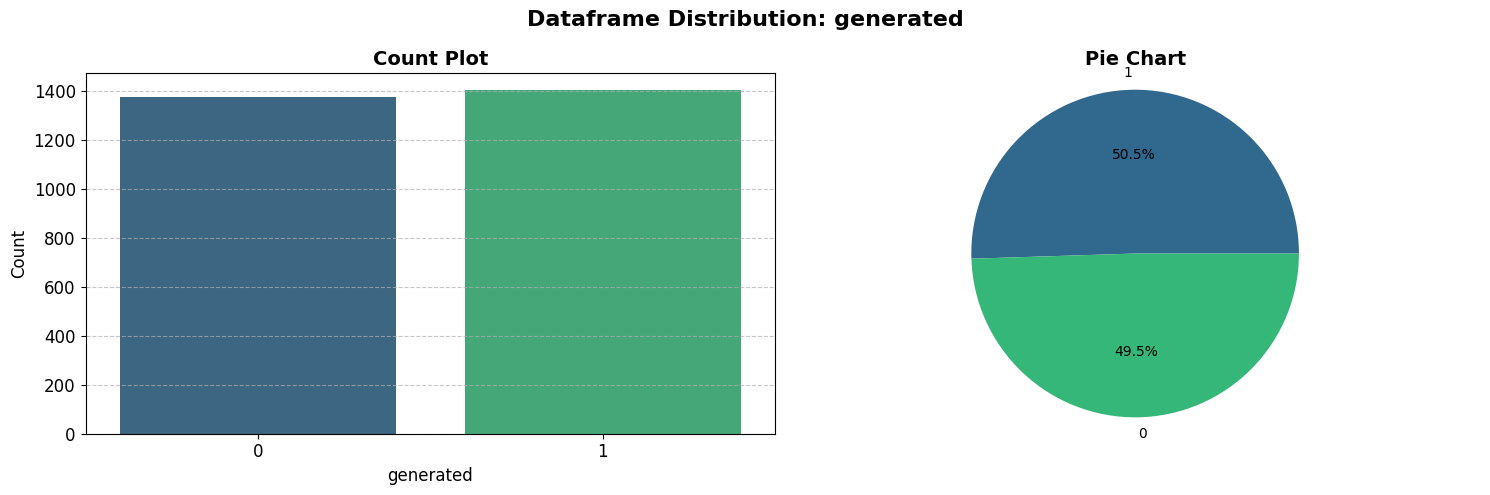

In [ ]:
func_plot_distribution(result_df, column_name='generated')

In [ ]:
# Add a new column for word count
result_df['word_count'] = result_df['text'].apply(lambda x: len(str(x).split()))


In [ ]:
print(result_df['word_count'].describe())


count    2778.000000
mean      466.985241
std       145.266557
min       235.000000
25%       371.250000
50%       413.000000
75%       523.000000
max      1360.000000
Name: word_count, dtype: float64


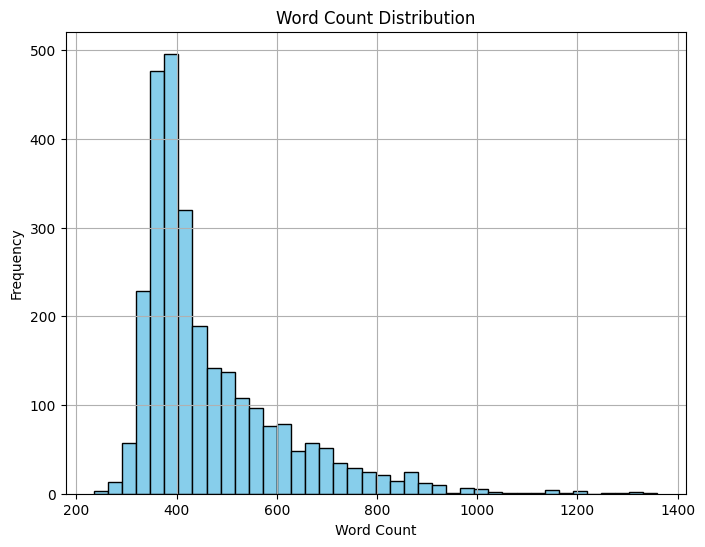

In [ ]:
import matplotlib.pyplot as plt

result_df['word_count'].hist(bins=40, color='skyblue', edgecolor='black', figsize=(8, 6))
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# 6 - Data Preprocessing



> Data preprocessing ensures that the text data is clean, consistent, and in a format that machine learning models can process.







Data preprocessing is done in a multiple stages, including:
1.   Data Cleaning
  - removing special characters
  - removing emojis
  - removing URLs
  - leaving periods, qustion marks and exclamation marks
  - removing unneccassary white spaces
  - Expanding contractions
2.  Handling stop words
3.  Tokenization
4.  Vectorization (TFIDF)

## 6.1 - Data Cleaning
Data Cleaning involves:
- removing unwanted special characters
- unnecessary whitespaces
- irrelevant elements
  * URLs
  * Emojis
- Retaining periods, commas, question marks, and exclamation marks.

- The text is also converted to **lowercase** to ensure uniformity, helping the model interpret words correctly without case sensitivity issues.

In [ ]:
def clean_text(text):
    """
    Cleans the text by removing unwanted characters while retaining periods, commas,
    question marks, and exclamation marks. Converts text to lowercase.
    """
    # Keep only letters, spaces, periods, commas, question marks, and exclamation marks
    text = re.sub(r"[^a-zA-Z\s.,!?]", "", text)
    # Remove extra spaces
    text = re.sub(r"\s+", " ", text).strip()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove any URLs from the text.

    # Handle emojis
    text = emoji.demojize(text, delimiters=(" ", " "))  # Convert emojis to text descriptions if `demojize` is True.

    # Expand contractions
    text = contractions.fix(text)  # Replace contractions with their expanded form (e.g., "can't" -> "cannot").

    # Convert to lowercase
    return text.lower()



# Apply the cleaning function to the 'text' column
result_df['cleaned_text'] = result_df['text'].apply(clean_text)

# Preview the cleaned text
print(result_df[['text', 'cleaned_text']].head())


                                                text  \
0  Cars. Cars have been around since they became ...   
1  Transportation is a large necessity in most co...   
2  "America's love affair with it's vehicles seem...   
3  How often do you ride in a car? Do you drive a...   
4  Cars are a wonderful thing. They are perhaps o...   

                                        cleaned_text  
0  cars. cars have been around since they became ...  
1  transportation is a large necessity in most co...  
2  americas love affair with its vehicles seems t...  
3  how often do you ride in a car? do you drive a...  
4  cars are a wonderful thing. they are perhaps o...  


## 6.2 - Handling Stop-Words

- Stopwords like "and," "is," or "the" can often be irrelevant for the task, but their removal depends on the problem.
- For classification tasks focusing on semantics, retaining them may help, especially if they contribute to the context.

In [ ]:
# Download stopwords if not already available
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = text.split()  # Split the text into individual words (tokens).
    tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into a single string
    return ' '.join(tokens)  # Combine the cleaned tokens back into a single string.

# Remove stopwords
result_df['cleaned_text'] = result_df['cleaned_text'].apply(remove_stopwords)

# Preview tokens after stopword removal
print(result_df[['cleaned_text']].head())


                                        cleaned_text
0  cars. cars around since became famous s, henry...
1  transportation large necessity countries world...
2  americas love affair vehicles seems cooling sa...
3  often ride car? drive one motor vehicle work? ...
4  cars wonderful thing. perhaps one worlds great...


# 7 - Feature Extraction
Text must be converted into numerical format to feed into machine learning models.

BPopular techniques include
- Bag of Words (BoW)
- TF-IDF for statistical representation
- Word Embeddings
  * like Word2Vec, GloVe
  * or Contextual embeddings (like BERT) for semantic representations.
  
These methods capture word importance, relationships, or context, enabling models to make more accurate predictions.


---



In this Notebook we will explore two methods:
1. TF-IDF
2. Contexual Embeddings with BERT
  - This will be explained and implemented in section 9.2 of the notebook


## 7.1 Text Vectorization (TF-IDF)

#### Explanation of Parameters

- **`lowercase=True`**: Converts all text to lowercase.

- **`stop_words='english'`**: Removes common English stopwords.

- **`token_pattern`**:
  - The default regex (`r"(?u)\b\w\w+\b"`) matches tokens of 2 or more characters.
  - The adjusted regex (`r"(?u)\b\w+\b"`) includes single-character tokens, which can be important for retaining punctuation marks like `.` or `?`.

- **`ngram_range=(1, 1)`**: Specifies unigrams (individual words). You can adjust to include bigrams (`(2, 2)`) or a range (`(1, 2)`).

- **`max_features=5000`**: Limits the number of tokens to the top 5,000 by TF-IDF score. Remove this parameter if you don't want a limit.


In [ ]:
# Define the custom vectorizer
vectorizer = TfidfVectorizer(
    lowercase=True,                   # Convert text to lowercase
    stop_words='english',             # Remove stopwords
    token_pattern=r"(?u)\b\w+\b",     # Tokenization pattern to match words
    ngram_range=(1, 1),               # Use unigrams (single words); adjust for n-grams
    max_features=100                 # Limit the number of features (optional)
)

# Apply the vectorizer to your cleaned text column
# X_tfidf = vectorizer.fit_transform(combined_df['text'])
X_tfidf = vectorizer.fit_transform(result_df['cleaned_text'])

# Get the feature names (tokens) generated by the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Print the feature names and TF-IDF matrix
print("Feature names:", feature_names[:10])  # Show first 10 tokens
print("TF-IDF matrix shape:", X_tfidf.shape)


Feature names: ['additionally' 'advantages' 'air' 'alternative' 'appeal' 'areas'
 'attention' 'believe' 'benefits' 'bogota']
TF-IDF matrix shape: (2778, 100)


In [ ]:
X_tfidf

<2778x100 sparse matrix of type '<class 'numpy.float64'>'
	with 99716 stored elements in Compressed Sparse Row format>

The output of `TfidfVectorizer` is a **sparse matrix** where each row represents a document (in your case, a piece of text), and each column corresponds to a token (word or n-gram) extracted during the vectorization process. The values in this matrix represent the **TF-IDF scores** for each token in each document.

---

#### **Breaking Down the Output**

#### **1. Sparse Matrix**
The output is a sparse matrix of shape `(n_samples, n_features)`, where:
- `n_samples` = Number of documents (rows in your dataset).
- `n_features` = Number of unique tokens (columns, also called the vocabulary size).

For example, if you have 5 text samples and the vectorizer identifies 10 unique tokens, the matrix shape will be `(5, 10)`.

#### **2. TF-IDF Scores**
Each value in the matrix is the **TF-IDF score** for a specific token in a specific document. This score indicates the importance of the token in that document relative to the entire corpus.

**TF-IDF Formula:**

TF-IDF(t, d) = TF(t, d) * IDF(t)


- **Term Frequency (TF):** How often a term `t` appears in a document `d`, normalized by the total number of terms in `d`:

TF(t, d) = (count of t in document d) / (total terms in document d)


- **Inverse Document Frequency (IDF):** Measures how unique a term is across all documents. It is calculated as:

IDF(t) = log(N / (1 + n_t))


Where:
- `N` is the total number of documents.
- `n_t` is the number of documents containing the term `t`.

#### **3. Feature Names**
The vectorizer also provides the names of the tokens (features) it extracted. You can get them using:



```
feature_names = vectorizer.get_feature_names_out()
```




# 8 - Train/Test Data Split

The vectorized data (data in their numerical form) resulting from the previous section are split into Training and test datasets with a reation of 70% to 30% respectively

The split Function recieves the:
- Features: X_tfidf => sparse matrix generated after vecorization
- Lables: result_df['generated'] => the label from the original Dataset

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf,                   # Feature matrix from TfidfVectorizer
    result_df['generated'],         # Target labels (0 = human, 1 = AI-generated)
    test_size=0.3,             # 30% of the data for testing
    random_state=42,           # For reproducibility
    stratify=result_df['generated'] # Maintain class distribution
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (1944, 100)
Test set shape: (834, 100)


# 9 - Classification

## 9.1 - Classical Machine Learning

### 9.1.1 - Logistic Regression

In [ ]:
# Initialize the logistic regression model
model = LogisticRegression(max_iter=50, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)


# Calculate accuracies
train_acc = accuracy_score(y_train, model.predict(X_train))
test_acc = accuracy_score(y_test, model.predict(X_test))

print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Test Accuracy: {test_acc * 100:.2f}%")

Training Accuracy: 99.90%
Test Accuracy: 99.64%


In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9964028776978417

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       413
           1       1.00      1.00      1.00       421

    accuracy                           1.00       834
   macro avg       1.00      1.00      1.00       834
weighted avg       1.00      1.00      1.00       834



Confusion Matrix:
 [[412   1]
 [  2 419]]


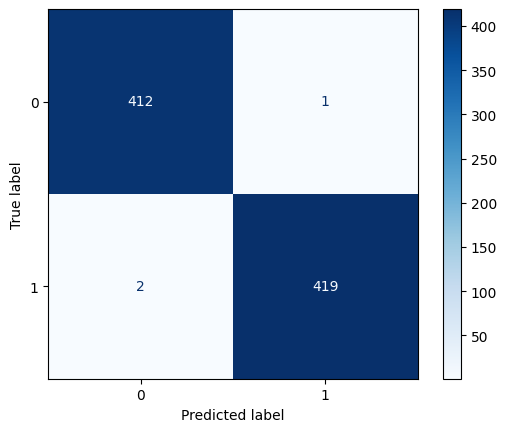

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


y_pred = model.predict(X_test)
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the raw confusion matrix
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')  # Adjust `cmap` for a color scheme


### 9.1.2 - Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Calculate accuracies
train_acc = accuracy_score(y_train, model.predict(X_train))
test_acc = accuracy_score(y_test, model.predict(X_test))

print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Print classification report for detailed metrics
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Training Accuracy: 100.00%
Test Accuracy: 99.76%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       413
           1       1.00      1.00      1.00       421

    accuracy                           1.00       834
   macro avg       1.00      1.00      1.00       834
weighted avg       1.00      1.00      1.00       834



### 9.1. - KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize KNN with k=5
knn_model = KNeighborsClassifier(n_neighbors=5, metric='cosine', weights='uniform')

# Train the model
knn_model.fit(X_train, y_train)

KNeighborsClassifier(metric='cosine')

In [ ]:
# Make predictions on training and test data
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

# Calculate accuracies
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Classification report
print("Classification Report:\n", classification_report(y_test, y_test_pred))


Training Accuracy: 99.74%
Test Accuracy: 99.52%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       413
           1       1.00      1.00      1.00       421

    accuracy                           1.00       834
   macro avg       1.00      1.00      1.00       834
weighted avg       1.00      1.00      1.00       834



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'cosine']
}

# Perform grid search
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 0.9969111917949807


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


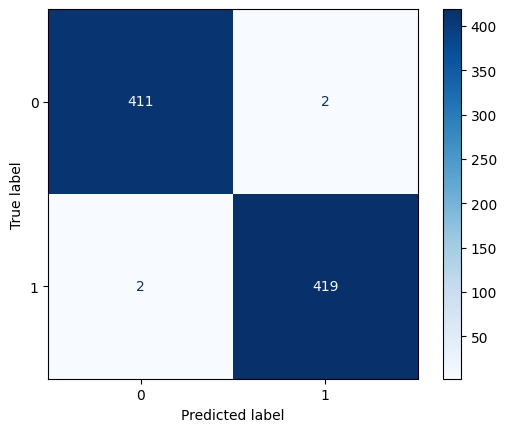

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)
disp.plot(cmap='Blues')
plt.show()


### 9.1.4 - SVMs

SVM Training Accuracy: 99.95%
SVM Test Accuracy: 99.76%

SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       413
           1       1.00      1.00      1.00       421

    accuracy                           1.00       834
   macro avg       1.00      1.00      1.00       834
weighted avg       1.00      1.00      1.00       834

SVM Confusion Matrix:
 [[413   0]
 [  2 419]]


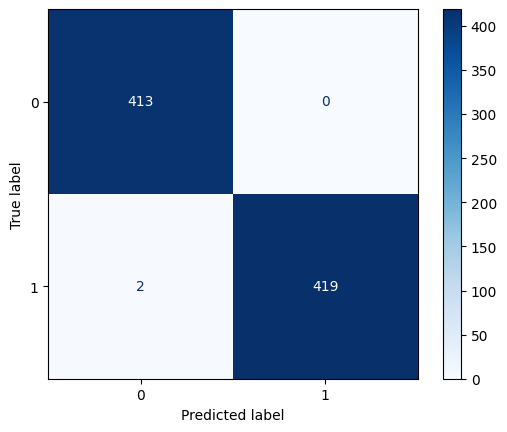

In [ ]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='linear', C=1, random_state=42) # linear kernel, Gamma = 1

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
train_acc_svm = accuracy_score(y_train, svm_model.predict(X_train))
test_acc_svm = accuracy_score(y_test, y_pred_svm)

print(f"SVM Training Accuracy: {train_acc_svm * 100:.2f}%")
print(f"SVM Test Accuracy: {test_acc_svm * 100:.2f}%")

print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("SVM Confusion Matrix:\n", cm_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm_model.classes_)
disp_svm.plot(cmap='Blues')
plt.show()

## 9.2 - Neural Networks

In this section, we classify text using a deep learning approach, which is going to be different than the previous approaches in:
- The Data representation
- The Classification Algorithm

### Key Difference in Data Representation
The primary distinction between this approach and the previous one lies in how we represent text data numerically (feature extraction). Previously, we used **TF-IDF (Term Frequency-Inverse Document Frequency)**, a statistical representation of text. While TF-IDF performed well for our use case, it has a limitations. It fails to capture the context and semantics of the text, as it treats each word independently and disregards word order or meaning.

### Vector Embeddings for Semantic Representation
To overcome these limitations, we use **vector embeddings**, a more sophisticated method of text representation.

**Vector embeddings** are dense, fixed-length representations of text where semantically similar pieces of text are closer in the vector space. These embeddings capture rich contextual and semantic information, making them particularly suitable for downstream tasks like classification.

We generate these embeddings by passing the text through a **large language model (LLM)** optimized for embedding generation. Some examples of such models include:
- **BERT (Bidirectional Encoder Representations from Transformers)**: Captures context from both directions (left and right).
- **DistilBERT**: A smaller, faster, and efficient version of BERT with minimal performance loss.
- **RoBERTa**: A robustly optimized version of BERT.

### Classification Using Neural Networks
Once we obtain the embeddings, we can approach classification in two ways:
1. Using classical statistical machine learning methods, such as logistic regression or support vector machines (SVM).
2. Using a neural network with a binary classification output head.





### 9.1 - Our Chosen Approach

For this project, we chose the second approach, as it offers the potential to better leverage the rich contextual information encapsulated in the embeddings.

### Why BERT for Embeddings?
We decided to use **BERT** for generating embeddings because of its proven effectiveness in capturing semantic and contextual information. BERT is pre-trained on a massive corpus of text and excels in transfer learning, making it suitable for our use case.

Additionally, BERT offers a variety of implementations including **DistilBERTForSequenceClassification**, which we decided to work with in our approach because it:
- Reduces the computational overhead compared to the full BERT model.
- Comes with a pre-defined classification head, simplifying our implementation process.



By leveraging this deep learning approach, we aim to achieve a more accurate classification performance compared to traditional statistical methods.

---

### Architecture

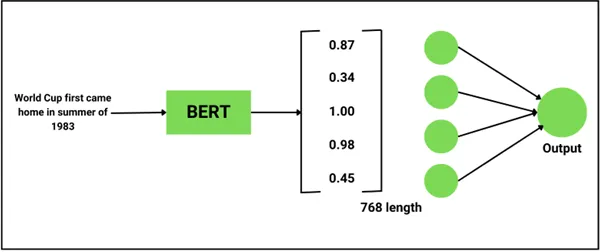

**DistilBERTForSequenceClassification** consists of two parts:
- Core Pretrained Distil BERT model
- A pre-designed MLP classification head for classifcation

We are going to freeze the parameters of the core BERT Model, and only train the classification head parameters.




#### Steps to Modify and Fine-Tune BERT for Text Classification
1. The Pretrained Distil-BERT Model generates embeddings, which will be fed into a classification head.
2. The Classification Layer is a simple fully connected (dense) layer on top of BERT's pooled output (token embedding) for binary classification.
3. Parameters of Distil-BERT Layers are freezed. We Only train  the classification layer.
4. Train on Your Dataset: Train the model using the labeled dataset

In [ ]:
! pip install datasets

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset
from sklearn.model_selection import train_test_split
import re

In [ ]:
# Split into train and test
texts = result_df['cleaned_text']
labels = result_df['generated']
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)


### 9.2 - Tokenization

We use the **DistilBERT Tokenizer** to convert text into token IDs suitable for the DistilBERT model.

- **Tokenizer**: `DistilBertTokenizer.from_pretrained('distilbert-base-uncased')`
- **Tokenization Parameters**:
  - `max_length=128`: Maximum token length.
  - `padding="max_length"`: Pads sequences to the maximum length.
  - `truncation=True`: Truncates sequences longer than `max_length`.

---

In [ ]:
# 3. **Tokenization using BERT Tokenizer**
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize_function(examples):
    return tokenizer(examples['cleaned_text'], padding='max_length', truncation=True, max_length=128)

### 9.3 - Dataset Preprocessing

The `TextDataset` class is preprocess the text datset before it is passed to the Bert model.
It performs the following key functions:



In [ ]:
from transformers import BertTokenizer, BertModel, BertForSequenceClassification, DistilBertTokenizer, DistilBertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from torch.optim import AdamW
from torch.nn import CrossEntropyLoss
import torch

In [ ]:


# Step 1: Define a custom dataset
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts.iloc[idx]
        label = self.labels.iloc[idx]
        encoding = self.tokenizer(
            text,
            max_length=self.max_len,
            padding="max_length",
            truncation=True,
            return_tensors="pt",
        )
        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
            "label": torch.tensor(label, dtype=torch.long),
        }

### 9.4 - Loading  Model and Training

In [ ]:
# Load pre-trained Distil-BERT model with classification head
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:


# Freeze the parameters of BERT model (only classification head will be trained)
for param in model.distilbert.parameters():
    param.requires_grad = False

#  Prepare dataset and dataloader
texts = X_train
labels = y_train

dataset = TextDataset(texts, labels, tokenizer, max_len=128)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

#  Define optimizer and loss
optimizer = AdamW(model.parameters(), lr=5e-3)
loss_fn = CrossEntropyLoss()

#  Training loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(3):  # Number of epochs
    model.train()
    for batch in dataloader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device)

        # Forward pass
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss  # Classification loss
        logits = outputs.logits  # Predicted scores

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Step 6: Save the fine-tuned model
model.save_pretrained("./fine_tuned_bert")
tokenizer.save_pretrained("./fine_tuned_bert")


Epoch 0, Loss: 0.7010154724121094
Epoch 0, Loss: 0.42748206853866577
Epoch 0, Loss: 1.2700436115264893
Epoch 0, Loss: 0.24975568056106567
Epoch 0, Loss: 0.7304835319519043
Epoch 0, Loss: 0.12947523593902588
Epoch 0, Loss: 0.1349378526210785
Epoch 0, Loss: 0.16917482018470764
Epoch 0, Loss: 0.13955260813236237
Epoch 0, Loss: 0.2253650575876236
Epoch 0, Loss: 0.025055037811398506
Epoch 0, Loss: 0.04773847013711929
Epoch 0, Loss: 0.12113944441080093
Epoch 0, Loss: 0.11364512145519257
Epoch 0, Loss: 0.04939364641904831
Epoch 0, Loss: 0.030360328033566475
Epoch 0, Loss: 0.018251681700348854
Epoch 0, Loss: 0.006893020123243332
Epoch 0, Loss: 0.07910246402025223
Epoch 0, Loss: 0.00798255205154419
Epoch 0, Loss: 0.00394628569483757
Epoch 0, Loss: 0.0013099091593176126
Epoch 0, Loss: 0.0016309090424329042
Epoch 0, Loss: 0.008048264309763908
Epoch 0, Loss: 0.0025106787215918303
Epoch 0, Loss: 0.000764101161621511
Epoch 0, Loss: 0.004343648906797171
Epoch 0, Loss: 0.011509339325129986
Epoch 0, Lo

('./fine_tuned_bert/tokenizer_config.json',
 './fine_tuned_bert/special_tokens_map.json',
 './fine_tuned_bert/vocab.txt',
 './fine_tuned_bert/added_tokens.json')

In [ ]:
# Load the fine-tuned model and tokenizer
tokenizer = DistilBertTokenizer.from_pretrained("./fine_tuned_bert")
model = DistilBertForSequenceClassification.from_pretrained("./fine_tuned_bert")

# Test with a new example
text = "This is a test of the fine-tuned model."
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=128)
with torch.no_grad():
    outputs = model(**inputs)

logits = outputs.logits
predictions = torch.argmax(logits, dim=-1)
print(f"Prediction: {'AI' if predictions.item() == 1 else 'Human'}")


Prediction: Human


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
texts = X_test
labels = y_test

dataset = TextDataset(texts, labels, tokenizer, max_len=128)
test_dataloader = DataLoader(dataset, batch_size=32, shuffle=False)


# Step 2: Load the fine-tuned model
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
model = DistilBertForSequenceClassification.from_pretrained("./fine_tuned_bert")
tokenizer = DistilBertTokenizer.from_pretrained("./fine_tuned_bert")

# Step 3: Evaluate the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()  # Set the model to evaluation mode

all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_dataloader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device)

        # Forward pass to get predictions
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=-1)  # Get class predictions

        # Collect predictions and true labels
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Step 4: Calculate evaluation metrics
accuracy = accuracy_score(all_labels, all_preds)
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average="binary")

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


# 10 - Analysis


## Analysis

In this project, we implemented a range of classification techniques to distinguish between AI-generated and human-generated text. While the models achieved very high accuracies (above 99% for both training and test datasets), these results prompted us to investigate potential issues.

### Observations

1. **Dataset Size and Complexity**
   - The dataset may lack sufficient complexity to challenge the models effectively.
   - The dataset's small size may lead to overfitting.

2. **Data Leakage**
   - Similarities between the training and test datasets suggest data leakage.
   - This issue arises from the repetitive nature of the dataset, as it was designed for a Kaggle competition. The dataset comprises answers written for just two prompts, with both AI and human responses generated based on a finite, fixed list of source texts.

### Proposed Solution

To address these challenges, we identified the following steps:

1. **Dataset Expansion**
   - Increase the dataset size by appending a more varied and larger dataset.
   - This approach aims to reduce repetitiveness and mitigate data leakage issues.

2. **Prompt Engineering**
   - Redesign prompts to ensure the LLM processes fewer source texts (one or two at most).
   - Introduce additional prompts to diversify the dataset.

3. **Limitations of AI-Generated Data**
   - While we can generate new AI data using updated prompts and dummy source texts, balancing this with corresponding human-generated text remains a challenge.
   - This method does not entirely resolve the repetitiveness of answers.

### Next Steps

We have identified and obtained a new, larger dataset that offers greater diversity. This dataset will be concatenated with the current dataset. Following this, we will repeat our analysis in a new notebook (`phase2.ipynb`) to evaluate the impact of the updated dataset.

---


# Further Research